In [ ]:
# Importar las bibliotecas necesarias
import numpy as np  # Importa NumPy, una biblioteca para cálculos numéricos en Python.
import pandas as pd  # Importa Pandas, una biblioteca para el manejo de datos en Python.
import matplotlib.pyplot as plt  # Importa Matplotlib, una biblioteca para visualización de datos en Python.
import seaborn as sns  # Importa Seaborn, una biblioteca de visualización basada en Matplotlib.
import math


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
#Importamos el archivo desde el drive de Fernando Alzuarte
d=pd.read_csv("/content/drive/MyDrive/Programación orientada a objetivos /precios_muestra.csv")
d

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [ ]:
# Calcula los rendimientos diarios para cada empresa utilizando pct_change()
rendimientos=d.pct_change().dropna()

rendimientos

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [ ]:

#Calcular la media y la desviación estandar de los rendimientos
media=rendimientos.mean()
media

desv=rendimientos.std()
desv

BLUE      0.023977
ORANGE    0.079601
dtype: float64

2.- Ahora que tenemos una serie de rendimientos de 12 meses, podemos producir el rendimiento com- puesto multiplicando los rendimientos de los períodos individuales, siempre y cuando los rendimien- tos se expresen como tasas de crecimiento.
Para componer los rendimientos, todo lo que tenemos que hacer es sumar 1 a cada rendimiento y luego multiplicarlos. El resultado está en formato “1+R”, por lo que debemos restar 1.
Calcula el rendimiento compuesto de las dos series.

In [ ]:
# Calcular el rendimiento compuesto
# Rendimiento compuesto = (Multiplicar todos los rendimientos + 1) - 1
rendimiento_compuesto = (rendimientos + 1).prod() - 1

# Imprimir el resultado
print("Rendimiento compuesto:", rendimiento_compuesto)


Rendimiento compuesto: BLUE      0.123310
ORANGE    0.087167
dtype: float64


3.- Anualiza un 1% mensual, un 4% trimestral y un 0,01% de rentabilidad diaria.


In [ ]:
# Definir una función para anualizar rendimientos
def anualizar_rendimiento(rendimiento_periodo, periodos_por_anio):

    return (1 + rendimiento_periodo)**periodos_por_anio - 1

# Definir tasas de rendimiento en diferentes períodos
mensual = 0.01
perm = 12
trimestral = 0.04
pert = 4
diario = 0.0001
perd = 252

# Calcular rendimientos anualizados utilizando la función
rendimiento_anual_mensual = anualizar_rendimiento(mensual, perm)
rendimiento_anual_trimestral = anualizar_rendimiento(trimestral, pert)
rendimiento_anual_diario = anualizar_rendimiento(diario, perd)

# Imprimir los resultados
print(f'Rendimiento anualizado mensual: {rendimiento_anual_mensual:.4f}')
print(f'Rendimiento anualizado trimestral: {rendimiento_anual_trimestral:.4f}')
print(f'Rendimiento anualizado diario: {rendimiento_anual_diario:.6f}')


Rendimiento anualizado mensual: 0.1268
Rendimiento anualizado trimestral: 0.1699
Rendimiento anualizado diario: 0.025519


4.- Ahora, anualiza la volatilidad escalándola (multiplicándola) por la raíz cuadrada del número de períodos por observación.


In [ ]:
# Definir la volatilidad en términos del período original
volatilidad_mensual = 0.02  # Por ejemplo, 2% de volatilidad mensual
periodos_por_mes = 12

# Anualizar la volatilidad escalándola
volatilidad_anual_mensual = volatilidad_mensual * math.sqrt(periodos_por_mes)

# Imprimir el resultado
print(f'Volatilidad anualizada mensual: {volatilidad_anual_mensual:.4f}')

Volatilidad anualizada mensual: 0.0693


5.- En tu Módulo (que creaste en las sesiones), escribe atributos a tu clase ya formada en donde calcules el rendimiento compuesto y en donde anualices rendimientos.

In [ ]:
from datetime import datetime
import yfinance as yf

class Asset:
    def __init__(self, ticker, start_date, end_date=datetime.today().strftime('%Y-%m-%d')):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.data = self.get_data()  # Descargar los datos al instanciar la clase

    def get_data(self):
        df = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        return df

    def simple_returns(self, adj=False, cum=False):
        if adj:
            simple_returns = self.data["Adj Close"].pct_change().dropna()
        else:
            simple_returns = self.data["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns
#Aqui estan los nuevos atributos
    def calculate_compound_return(self):
        simple_returns = self.simple_returns()
        compound_return = (1 + simple_returns).prod() - 1
        return compound_return

    def annualize_returns(self, rendimiento_periodo, periodos_por_anio):
        return (1 + rendimiento_periodo) ** periodos_por_anio - 1

6.- Crea un DataFrame a partir de un diccionario cuyas columnas sean “Stock A” y “Stock B”. Cada
columna tendrá 10 valores que deberás elegir a partir de una distribución normal con parámetros
10 (media) y 2 (desviación estándar).


In [ ]:
data = {
    "Stock A": np.random.normal(10, 2, 10),
    "Stock B": np.random.normal(10, 2, 10)
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)

     Stock A    Stock B
0   7.191186  10.124598
1  10.943255   8.589740
2  11.210748   9.772116
3  11.428486   7.844253
4   7.406730  10.824210
5   7.122586   7.432669
6   7.076195   8.727943
7  12.835300  12.584872
8  13.033969   9.239438
9  11.385277   7.741223


7.- Usando las funciones ya creadas en tu Módulo, calcular el rendimiento total (compuesto) durante todo el período de tiempo. También, calcula la media y la desviación estándar de cada Stock. Después, anualiza la desviación estándar.

In [ ]:
rendstocks=df.pct_change().dropna()
compuesto_stocks = (rendstocks + 1).prod() - 1

# Imprimir el rendimiento compuesto
print("Rendimiento compuesto:", compuesto_stocks)

media_stocks=rendstocks.mean()
print("Media rendimientos:", media_stocks)

desv_stocks=rendstocks.std()
print("Desviacion estandar rendimientos:", desv_stocks)


Rendimiento compuesto: Stock A    0.583227
Stock B   -0.235404
dtype: float64
Media rendimientos: Stock A    0.096855
Stock B    0.004836
dtype: float64
Desviacion estandar rendimientos: Stock A    0.352270
Stock B    0.284108
dtype: float64


In [ ]:
# Anualizar la desviación estándar
# Definir la volatilidad en términos del período original
volatilidad_mensual = desv_stocks  # Cambiar el nombre de la variable si es necesario

# Anualizar la volatilidad escalándola
periodos_por_anio = 252  # Suponiendo que haya 12 meses en un año y los 10 datos de los stocks sean diarios
desviacion_anual = volatilidad_mensual * math.sqrt(periodos_por_anio)

# Imprimir el resultado
print("Desviación estándar anualizada:", desviacion_anual)

Desviación estándar anualizada: Stock A    5.592119
Stock B    4.510080
dtype: float64


8. Crea dos activos artificiales que llamarás “AA” y “BB”, respectivamente. Supongamos que un cierto activo “AA” pierde 1% por mes durante 12 meses y un cierto activo “BB” gana 1% por mes para los 12 meses. ¿Cuál es el activo más volátil? Recuerda que la volatilidad se mide a través de la desviación estándar.

In [ ]:
# Crear una serie de datos para el activo "AA" que pierde 1% al mes durante 12 meses
rendimientos_AA = pd.Series([-0.01] * 12)

# Crear una serie de datos para el activo "BB" que gana 1% al mes durante 12 meses
rendimientos_BB = pd.Series([0.01] * 12)

# Calcular la desviación estándar de los rendimientos de "AA" y "BB" para medir la volatilidad
volatilidad_AA = np.std(rendimientos_AA)
volatilidad_BB = np.std(rendimientos_BB)

# Comparar la volatilidad de los activos
if volatilidad_AA > volatilidad_BB:
    print("El activo AA es más volátil.")
elif volatilidad_BB > volatilidad_AA:
    print("El activo BB es más volátil.")
else:
    print("Ambos activos tienen la misma volatilidad.")

Ambos activos tienen la misma volatilidad.


9.- Usando tu Módulo, descarga los tickers “AMZN”, “KO”, “MSFT” desde el primero de enero del 2011 hasta el primero de enero del 2019. Realiza un análisis financiero usando lo visto en clase y los incisos anteriores. Finalmente, realiza un histograma para los rendimientos de cada ticker. ¿Qué observas de los histogramas?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Rendimiento Compuesto de AMZN: 7.1531320708926796
Rendimiento Compuesto de KO: 0.4520085123546609
Rendimiento Compuesto de MSFT: 2.6300929719996025


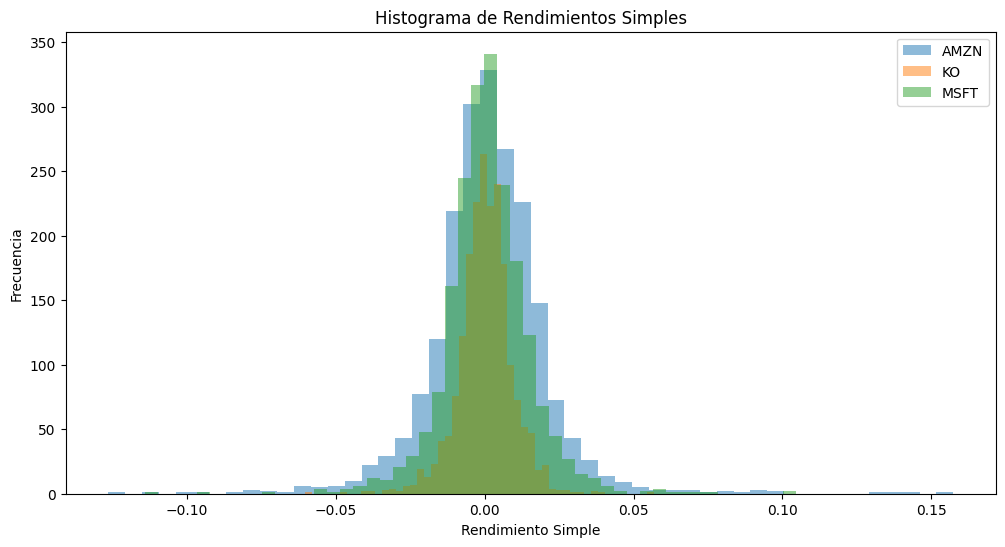

In [ ]:
# Descargar datos para los tres tickers
amzn_asset = Asset("AMZN", "2011-01-01", "2019-01-01")
ko_asset = Asset("KO", "2011-01-01", "2019-01-01")
msft_asset = Asset("MSFT", "2011-01-01", "2019-01-01")

# Calcular rendimientos compuestos
amzn_compound_return = amzn_asset.calculate_compound_return()
ko_compound_return = ko_asset.calculate_compound_return()
msft_compound_return = msft_asset.calculate_compound_return()

# Imprimir rendimientos compuestos
print("Rendimiento Compuesto de AMZN:", amzn_compound_return)
print("Rendimiento Compuesto de KO:", ko_compound_return)
print("Rendimiento Compuesto de MSFT:", msft_compound_return)

# Calcular rendimientos simples
amzn_simple_returns = amzn_asset.simple_returns()
ko_simple_returns = ko_asset.simple_returns()
msft_simple_returns = msft_asset.simple_returns()

# Crear un histograma para los rendimientos simples
plt.figure(figsize=(12, 6))
plt.hist(amzn_simple_returns, bins=50, alpha=0.5, label="AMZN")
plt.hist(ko_simple_returns, bins=50, alpha=0.5, label="KO")
plt.hist(msft_simple_returns, bins=50, alpha=0.5, label="MSFT")
plt.xlabel("Rendimiento Simple")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Histograma de Rendimientos Simples")
plt.show()

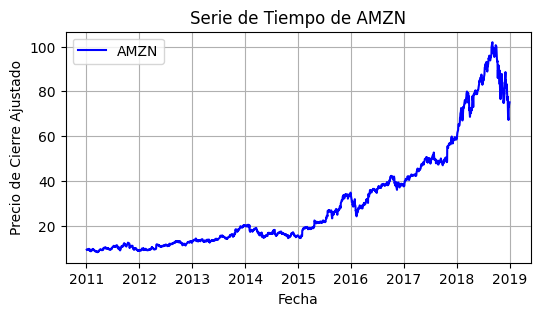

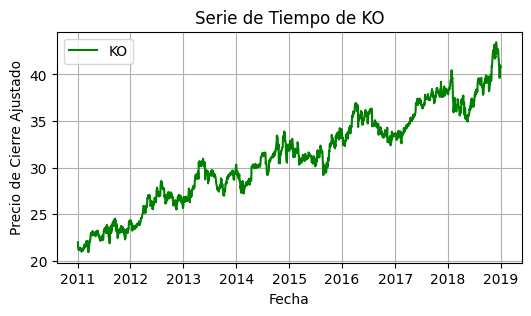

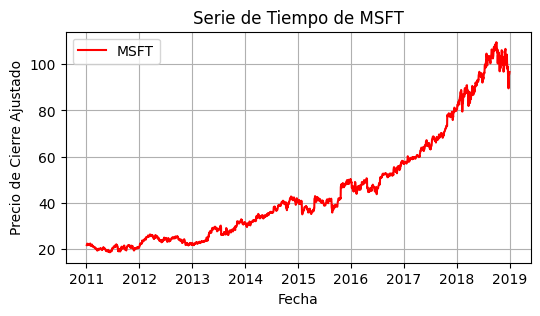

In [ ]:
# Gráfica de la serie de tiempo para AMZN
plt.figure(figsize=(6, 3))
plt.plot(amzn_asset.data.index, amzn_asset.data["Adj Close"], label="AMZN", color='blue')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Serie de Tiempo de AMZN")
plt.legend()
plt.grid()
plt.show()

# Gráfica de la serie de tiempo para KO
plt.figure(figsize=(6, 3))
plt.plot(ko_asset.data.index, ko_asset.data["Adj Close"], label="KO", color='green')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Serie de Tiempo de KO")
plt.legend()
plt.grid()
plt.show()

# Gráfica de la serie de tiempo para MSFT
plt.figure(figsize=(6, 3))
plt.plot(msft_asset.data.index, msft_asset.data["Adj Close"], label="MSFT", color='red')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Serie de Tiempo de MSFT")
plt.legend()
plt.grid()
plt.show()

CONCLUSIONES
Como conlsuiones podemos ver que las tres acciones han tenido un crecimiento notable, evidenciando su importancia en sus industrias y el buen funcionamiento de estos monstruos de empresas. Amazon y MIcrosoft al ser empresas mas tecnologicas tienen mas potencial de crecimiento que Coca Cola y se ve reflejado en que tuvieron un mayor crecimiento durante este periodo. Las tres empresas tienen un crecimiento constante, Amazon es la que mas flucutaciones presenta, tomando en cuenta que es la empresa mas nueva de las tres.